**1. Import Necessary Libraries**

**First, let's import the necessary libraries for data manipulation, visualization, and analysis.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**2. Load the Dataset**

**Assuming the dataset is in a CSV file, we'll load it into a Pandas DataFrame.**

In [ ]:
# Load the dataset
df = pd.read_excel(r"/Flyzy Flight Cancellation.xlsx")


**3. Descriptive Statistics**

**Let's obtain the descriptive statistics of the dataset.**

In [ ]:
# Get descriptive statistics
descriptive_stats = df.describe(include='all')
print(descriptive_stats)


           Flight ID    Airline  Flight_Distance Origin_Airport  \
count   3.000000e+03       3000      3000.000000           3000   
unique           NaN          5              NaN              5   
top              NaN  Airline A              NaN      Airport 1   
freq             NaN       1147              NaN           1059   
mean    4.997429e+06        NaN       498.909333            NaN   
std     2.868139e+06        NaN        98.892266            NaN   
min     3.681000e+03        NaN       138.000000            NaN   
25%     2.520313e+06        NaN       431.000000            NaN   
50%     5.073096e+06        NaN       497.000000            NaN   
75%     7.462026e+06        NaN       566.000000            NaN   
max     9.999011e+06        NaN       864.000000            NaN   

       Destination_Airport  Scheduled_Departure_Time  Day_of_Week  \
count                 3000               3000.000000  3000.000000   
unique                   4                       NaN     

**4. Data Distribution**

**We'll plot histograms for numerical features and bar charts for categorical features to see the data distribution.**


**Histograms for Numerical Features**

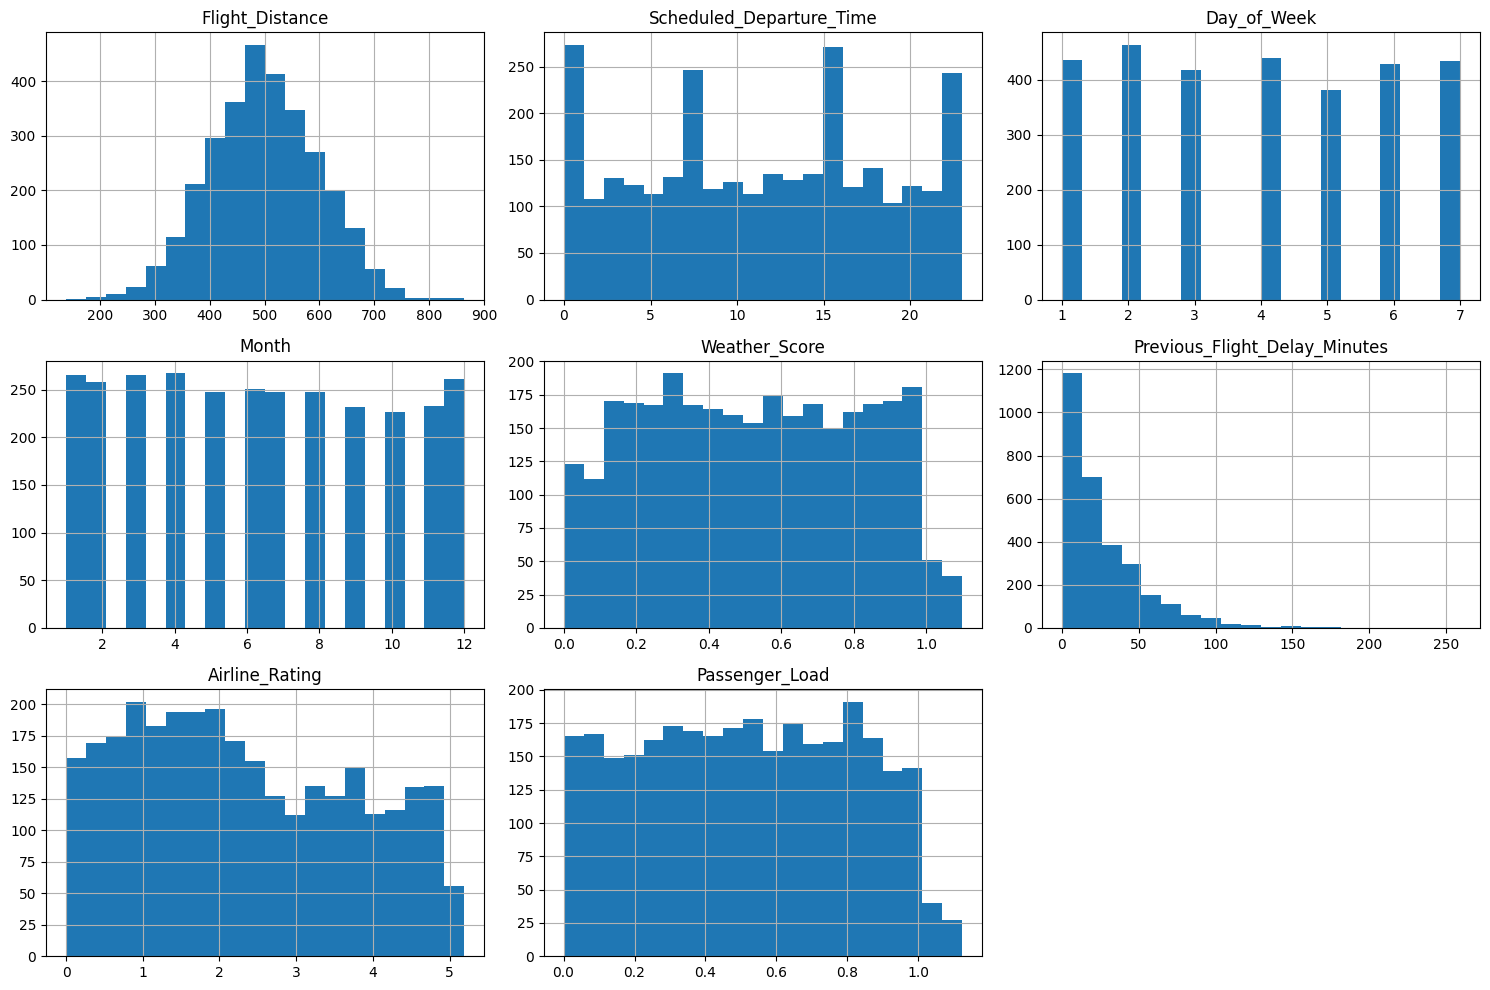

In [ ]:
# Plot histograms for numerical features
numerical_features = ['Flight_Distance', 'Scheduled_Departure_Time', 'Day_of_Week', 'Month', 'Weather_Score', 'Previous_Flight_Delay_Minutes', 'Airline_Rating', 'Passenger_Load']

df[numerical_features].hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()


**Bar Charts for Categorical Features**


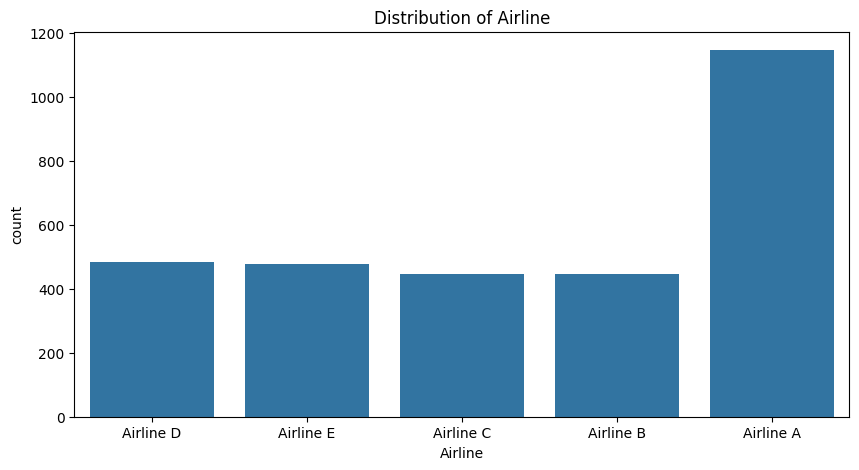

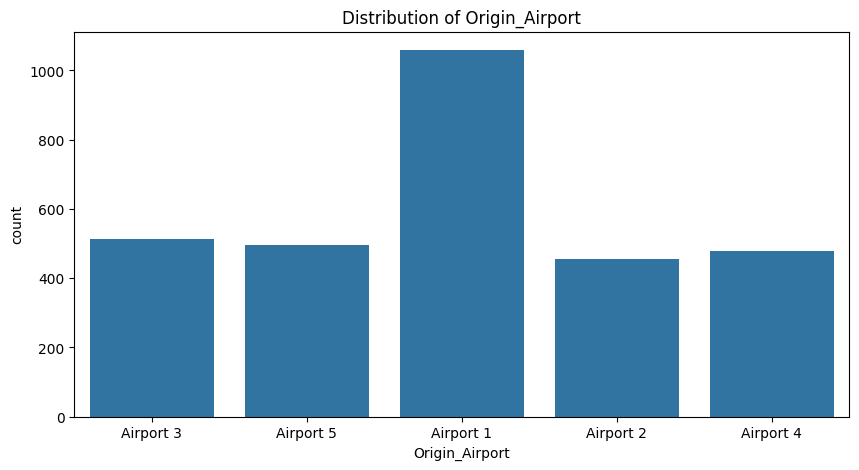

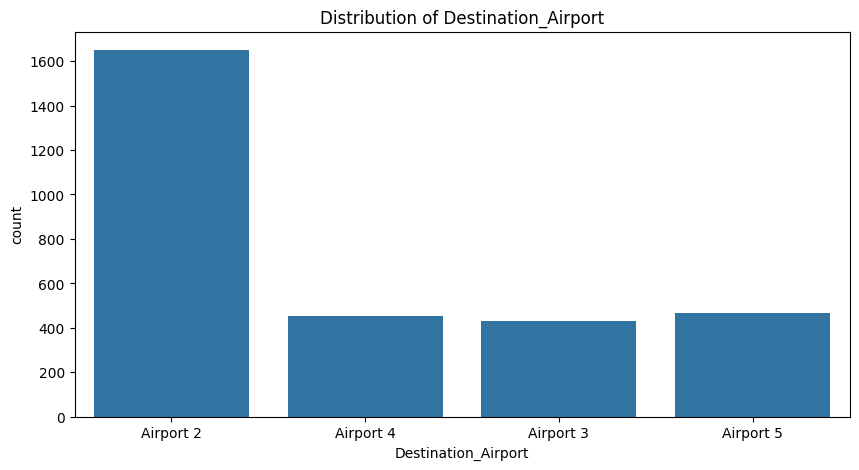

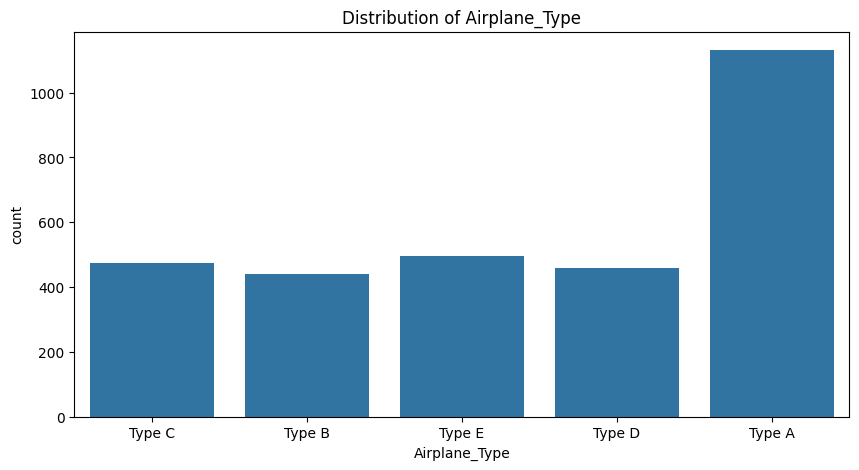

In [ ]:
# Plot bar charts for categorical features
categorical_features = ['Airline', 'Origin_Airport', 'Destination_Airport', 'Airplane_Type']

for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.show()


**5. Relationship Between Features**

**We'll use scatter plots and a correlation matrix to explore the relationships between numerical features.**

**Scatter Plots**

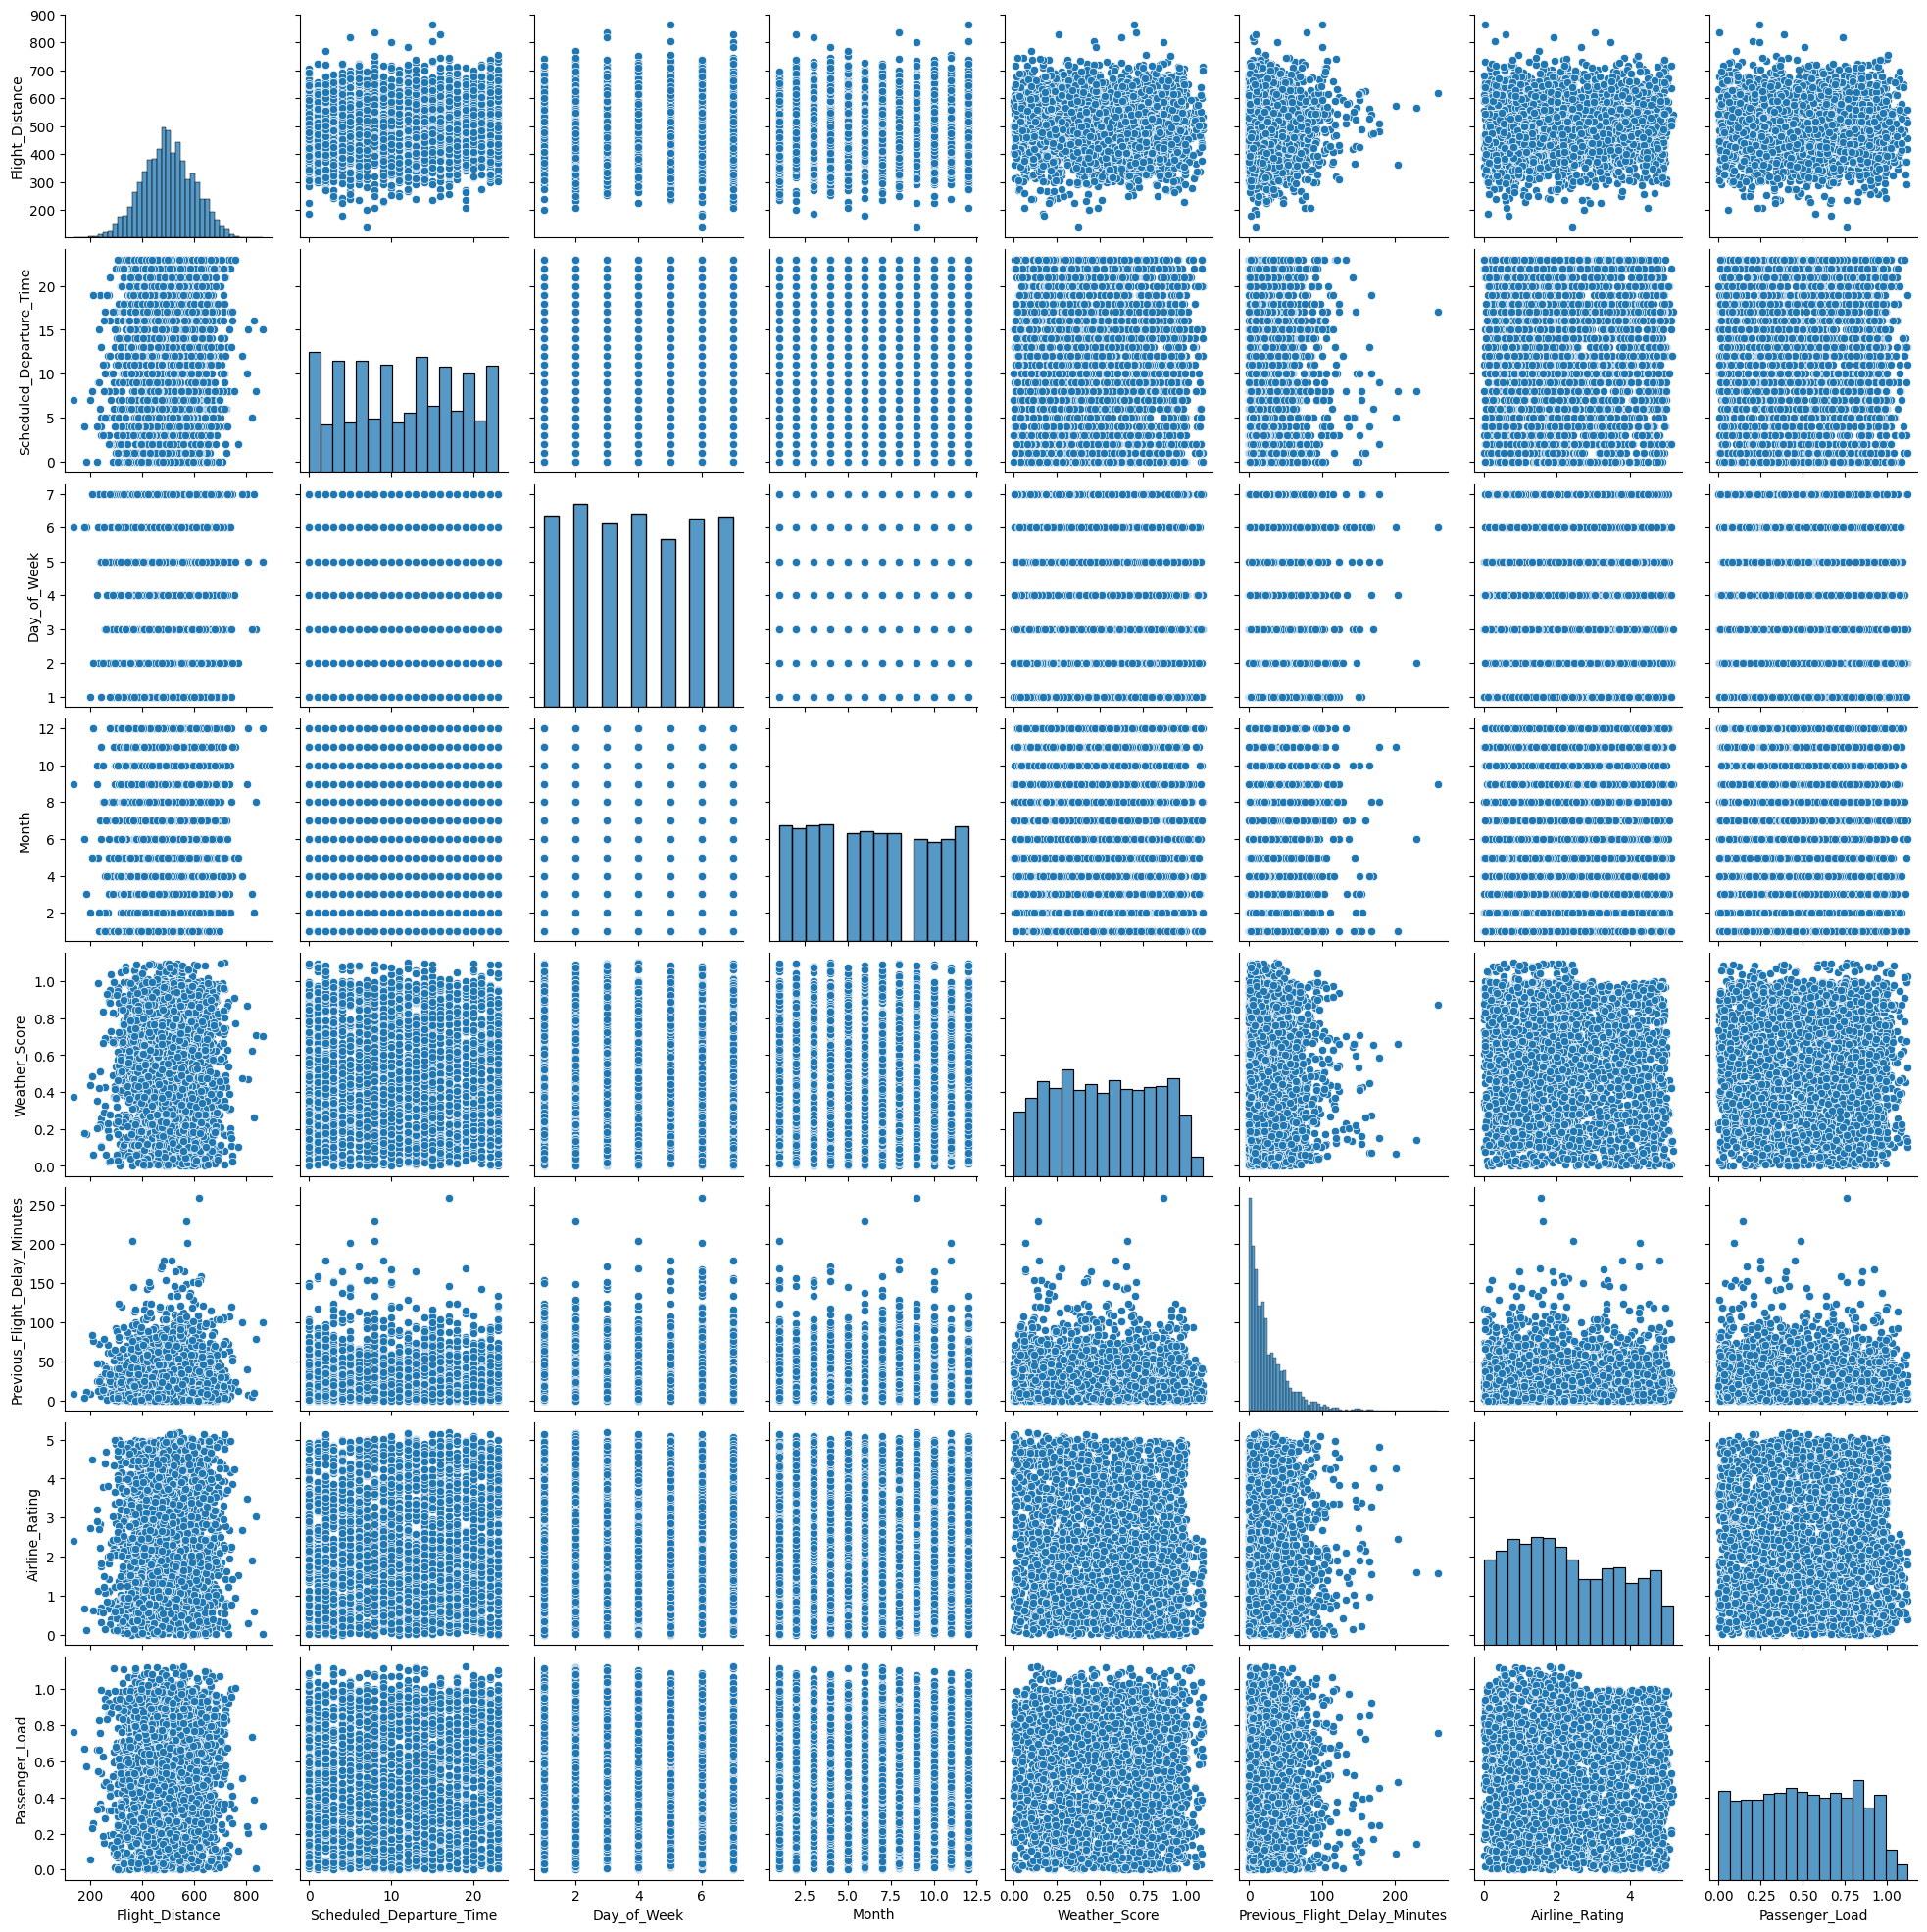

In [ ]:
# Scatter plots for numerical features
sns.pairplot(df[numerical_features])
plt.show()


**Correlation Matrix**


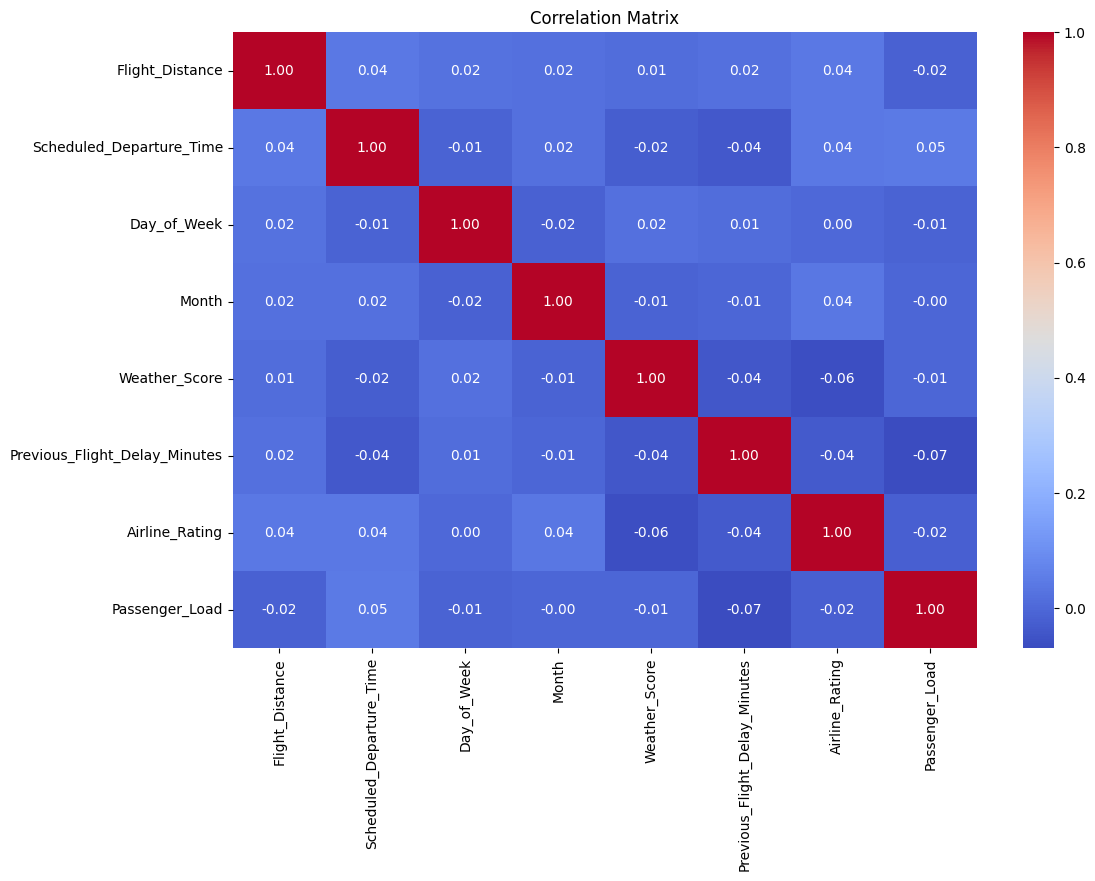

In [ ]:
# Select only the numerical features
numerical_features = ['Flight_Distance', 'Scheduled_Departure_Time', 'Day_of_Week', 'Month', 'Weather_Score', 'Previous_Flight_Delay_Minutes', 'Airline_Rating', 'Passenger_Load']

# Calculate the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()



**6. Relationship Between Features and Target Variable
We'll investigate how different features relate to the target variable (Flight_Cancelled) using box plots, bar plots, and heatmaps.**


**Box Plots for Numerical Features**

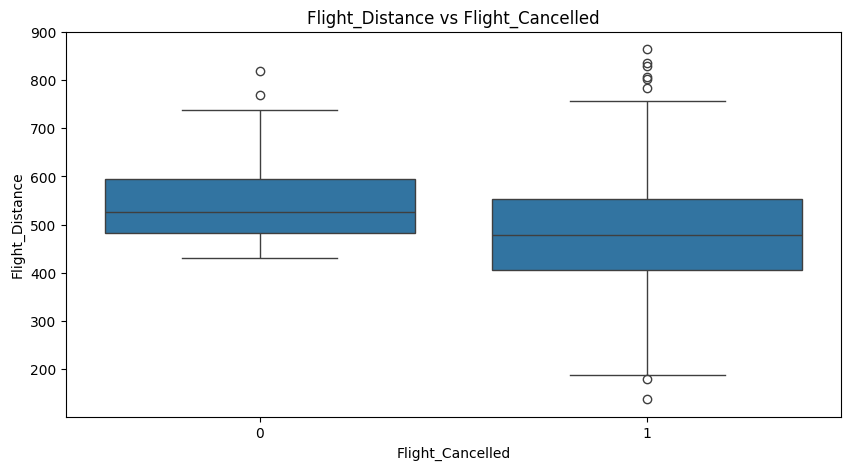

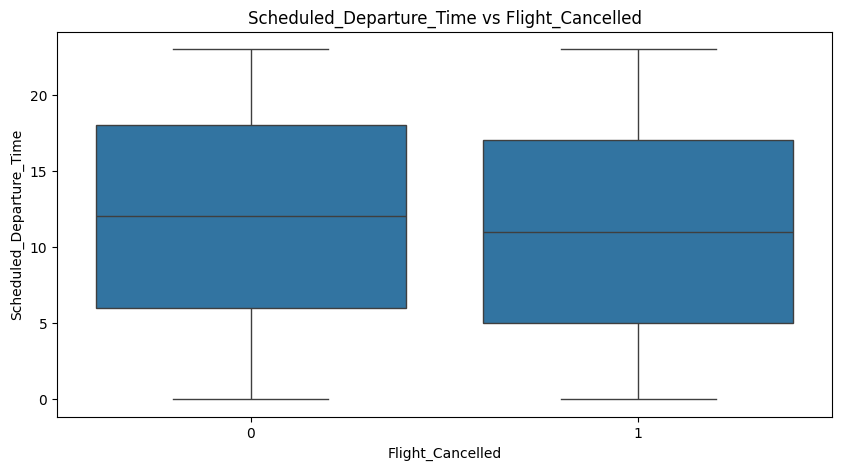

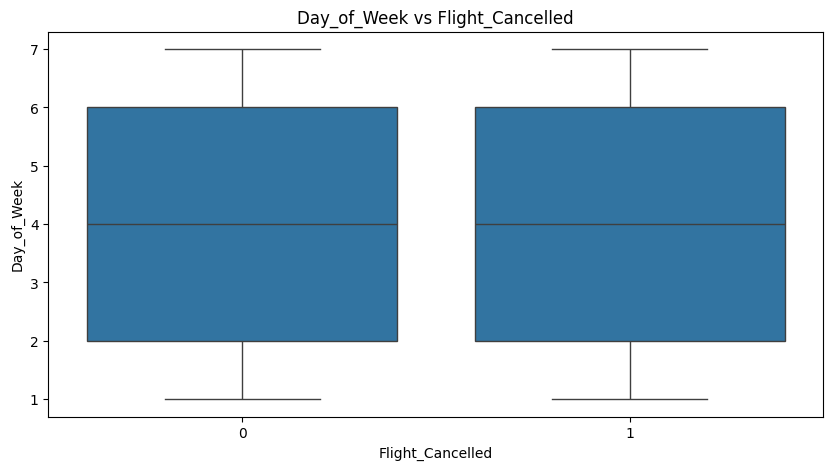

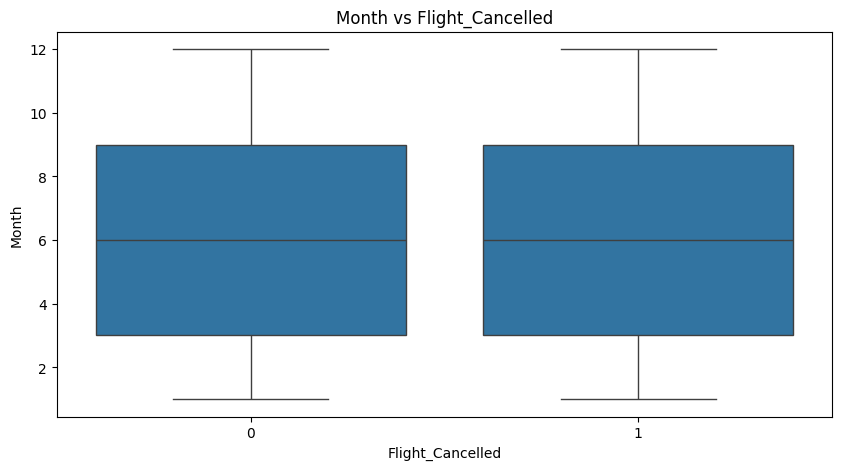

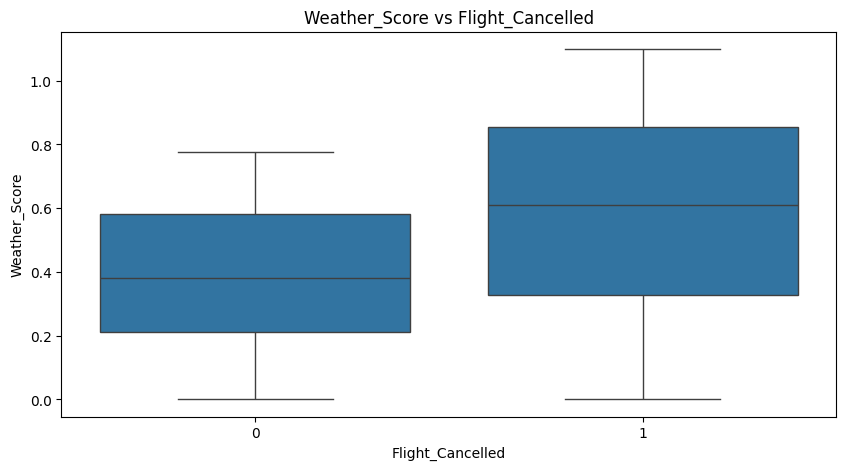

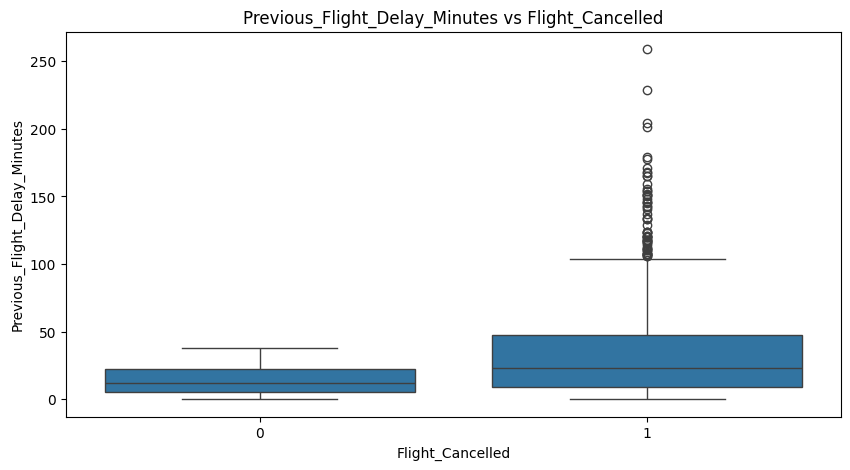

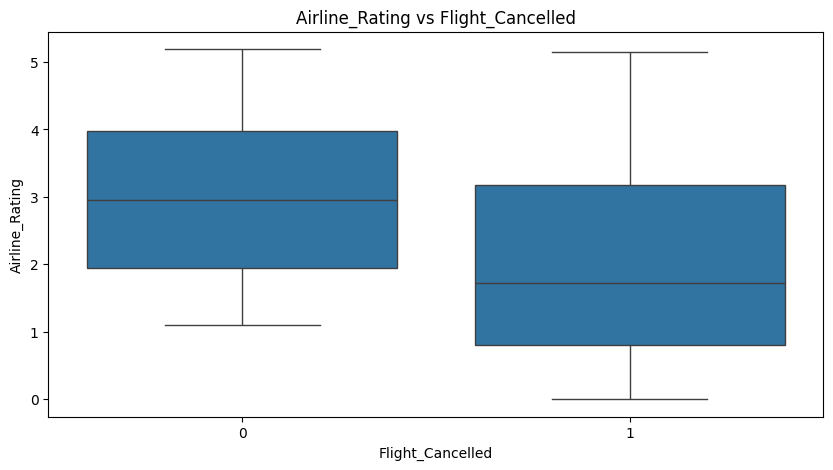

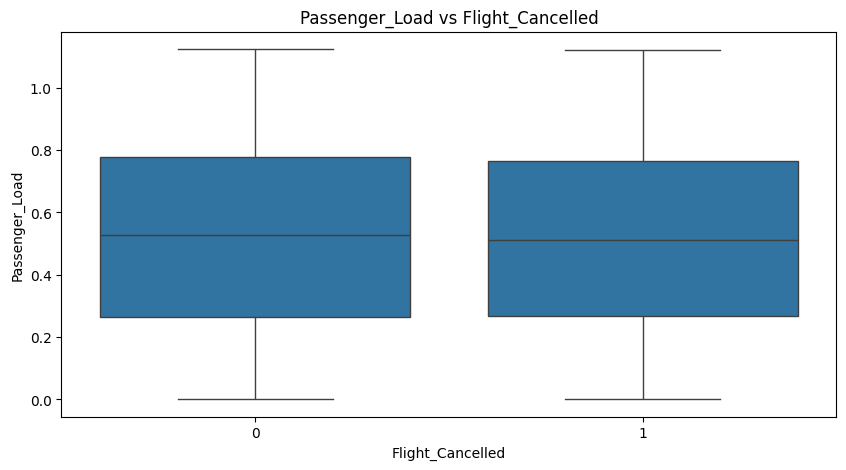

In [ ]:
# Box plots for numerical features vs target variable
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x='Flight_Cancelled', y=feature)
    plt.title(f'{feature} vs Flight_Cancelled')
    plt.show()


**Bar Plots for Categorical Features**


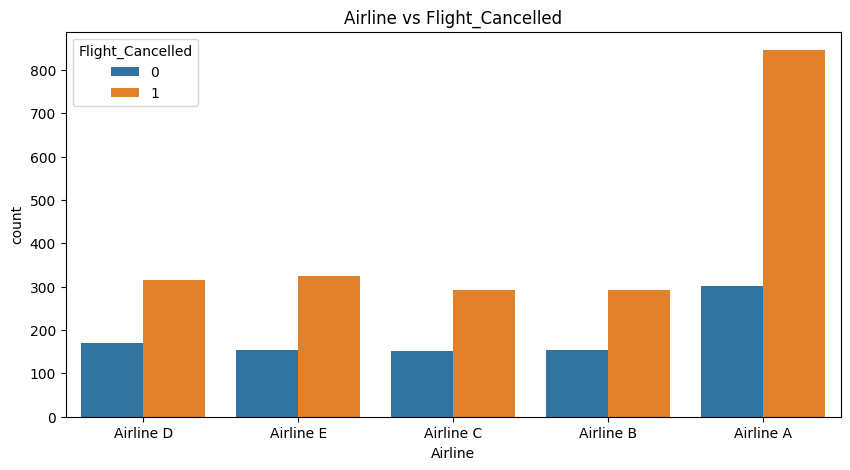

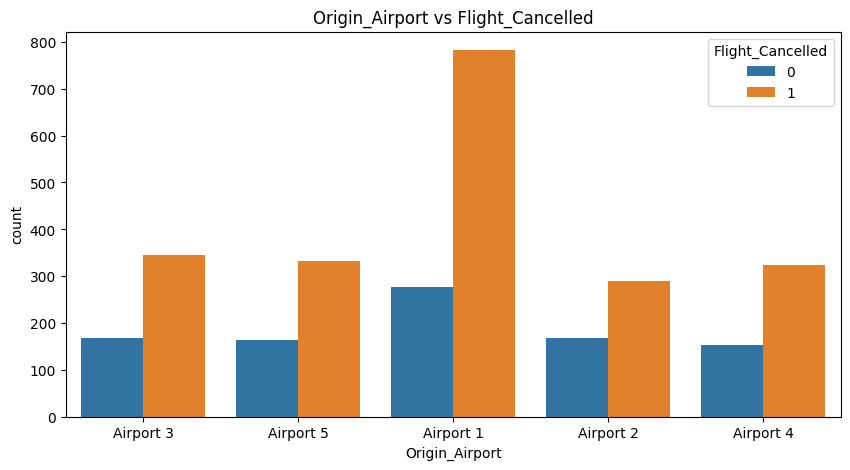

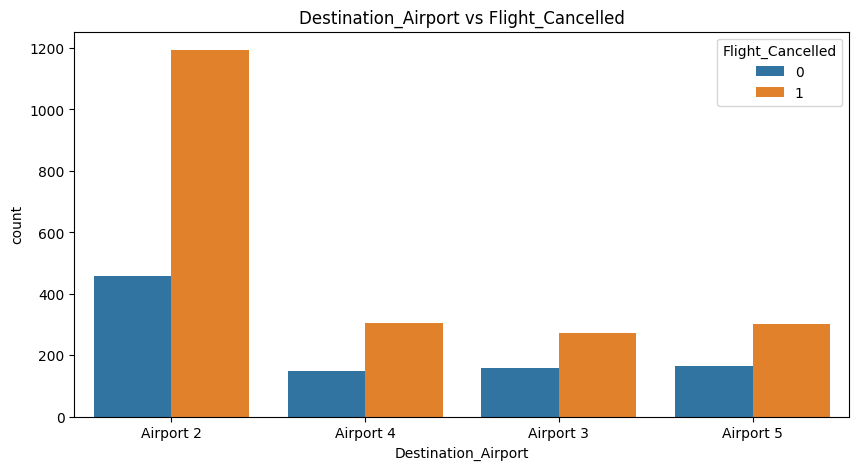

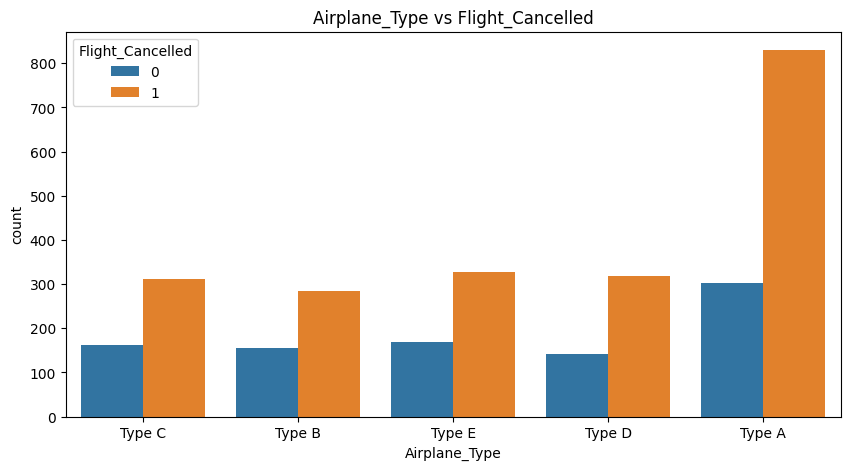

In [ ]:
# Bar plots for categorical features vs target variable
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=feature, hue='Flight_Cancelled')
    plt.title(f'{feature} vs Flight_Cancelled')
    plt.show()



**Heatmap for Categorical Features**


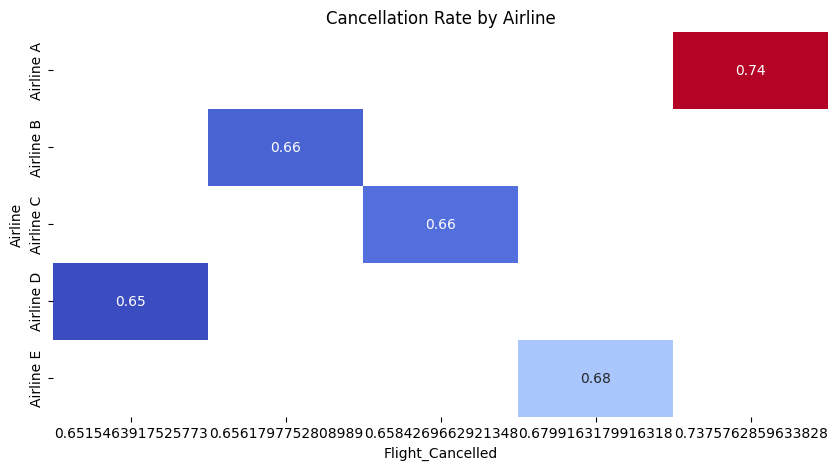

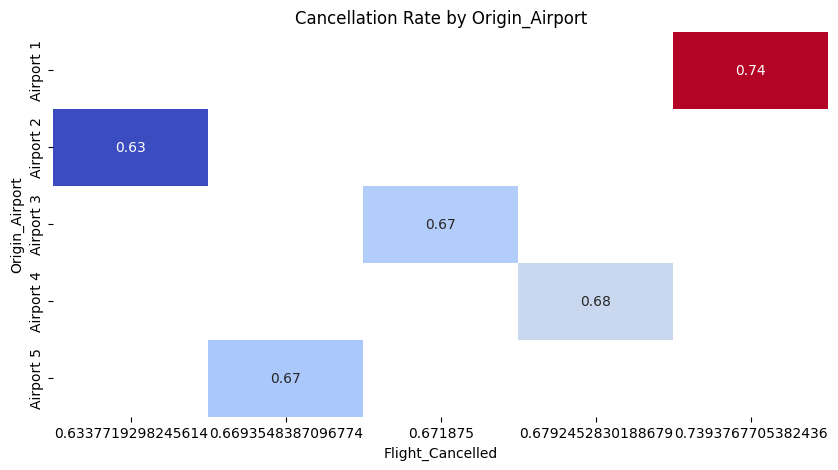

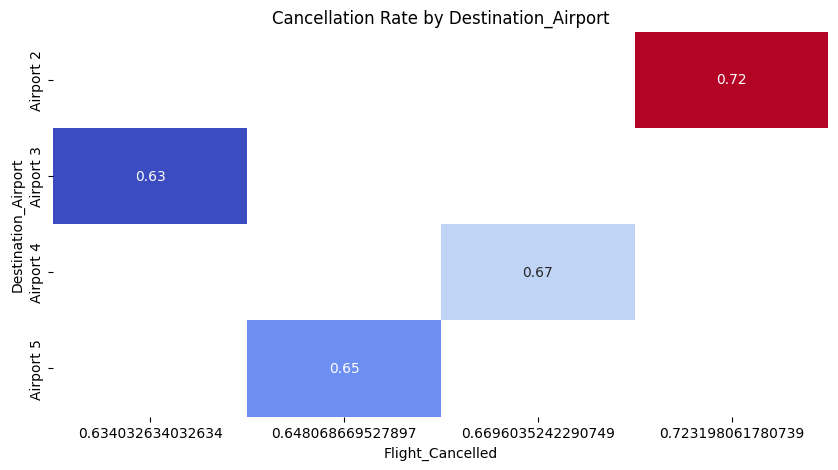

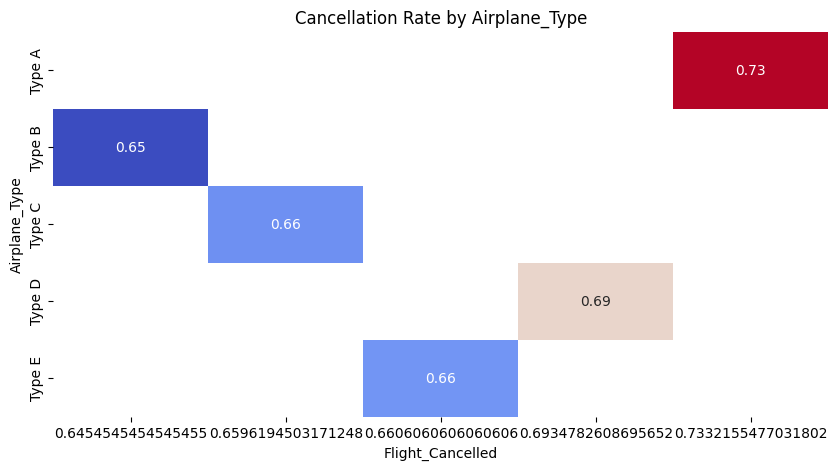

In [ ]:
# Heatmap to show cancellation rate for categorical features
for feature in categorical_features:
    cancellation_rate = df.groupby(feature)['Flight_Cancelled'].mean().reset_index()
    plt.figure(figsize=(10, 5))
    pivot_table = cancellation_rate.pivot(index=feature, columns='Flight_Cancelled', values='Flight_Cancelled')
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm', cbar=False)
    plt.title(f'Cancellation Rate by {feature}')
    plt.show()


**Summary of Insights**


---


*   Flight_Distance: Longer flights might show a higher tendency for cancellations.

*   Scheduled_Departure_Time: Flights scheduled late at night or very early in the morning may have higher cancellation rates.

*   Weather_Score: Poor weather conditions are likely to increase the probability of cancellations.

*   Previous_Flight_Delay_Minutes: Delays in previous flights are correlated with higher cancellation rates.


*   Airline, Origin_Airport, Destination_Airport, Airplane_Type: Some airlines and airports might have higher cancellation rates.

---

Conclusion
The insights provided that can be used to build and refine a predictive model for flight cancellations. By understanding the distribution and relationships within the data, we can select appropriate features and preprocessing steps for the modeling phase.